# Problem Statement

The "Clustering, EDA - Data Science and STEM Salaries" report provides a clean approach to the classification of data in relation to Data Science and Stem salaries, but its methods for the system of classification could use some improvement. The main objective of this project will be to replicate the results obtained by the original creator, and provide some insight on how the project can be improved in order to ensure more consistent classification Results.

In [139]:
import pandas as pd
pd.set_option('display.max_columns', None)
import random
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import kmeans_plusplus
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from matplotlib import colors
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [186]:
salary_data = pd.read_csv('Levels_Fyi_Salary_Data.csv')

In [187]:
salary_data = salary_data.rename(
            columns={
                    "totalyearlycompensation": "total_yearly_compensation", 
                    "yearsofexperience": "years_of_experience",
                    "yearsatcompany": "years_at_company",
                    "basesalary": "base_salary",
                    "stockgrantvalue": "stock_grant_value"
                    }
              )

salary_data = salary_data.drop(labels=["timestamp", "tag", "dmaid", "cityid", "otherdetails", "Some_College",
                    "Masters_Degree", "Bachelors_Degree", "Doctorate_Degree",
                    'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 
                    'Race_Hispanic', 'Highschool', 'rowNumber', 'bonus'], axis = 1)

salary_data = salary_data.dropna(subset=['company', 'level'])

salary_data = salary_data.fillna('Unknown')
salary_data = salary_data[salary_data['years_of_experience'] < 30]

array([[<AxesSubplot:xlabel='total_yearly_compensation', ylabel='total_yearly_compensation'>,
        <AxesSubplot:xlabel='years_of_experience', ylabel='total_yearly_compensation'>,
        <AxesSubplot:xlabel='years_at_company', ylabel='total_yearly_compensation'>,
        <AxesSubplot:xlabel='base_salary', ylabel='total_yearly_compensation'>,
        <AxesSubplot:xlabel='stock_grant_value', ylabel='total_yearly_compensation'>],
       [<AxesSubplot:xlabel='total_yearly_compensation', ylabel='years_of_experience'>,
        <AxesSubplot:xlabel='years_of_experience', ylabel='years_of_experience'>,
        <AxesSubplot:xlabel='years_at_company', ylabel='years_of_experience'>,
        <AxesSubplot:xlabel='base_salary', ylabel='years_of_experience'>,
        <AxesSubplot:xlabel='stock_grant_value', ylabel='years_of_experience'>],
       [<AxesSubplot:xlabel='total_yearly_compensation', ylabel='years_at_company'>,
        <AxesSubplot:xlabel='years_of_experience', ylabel='years_at_company'>

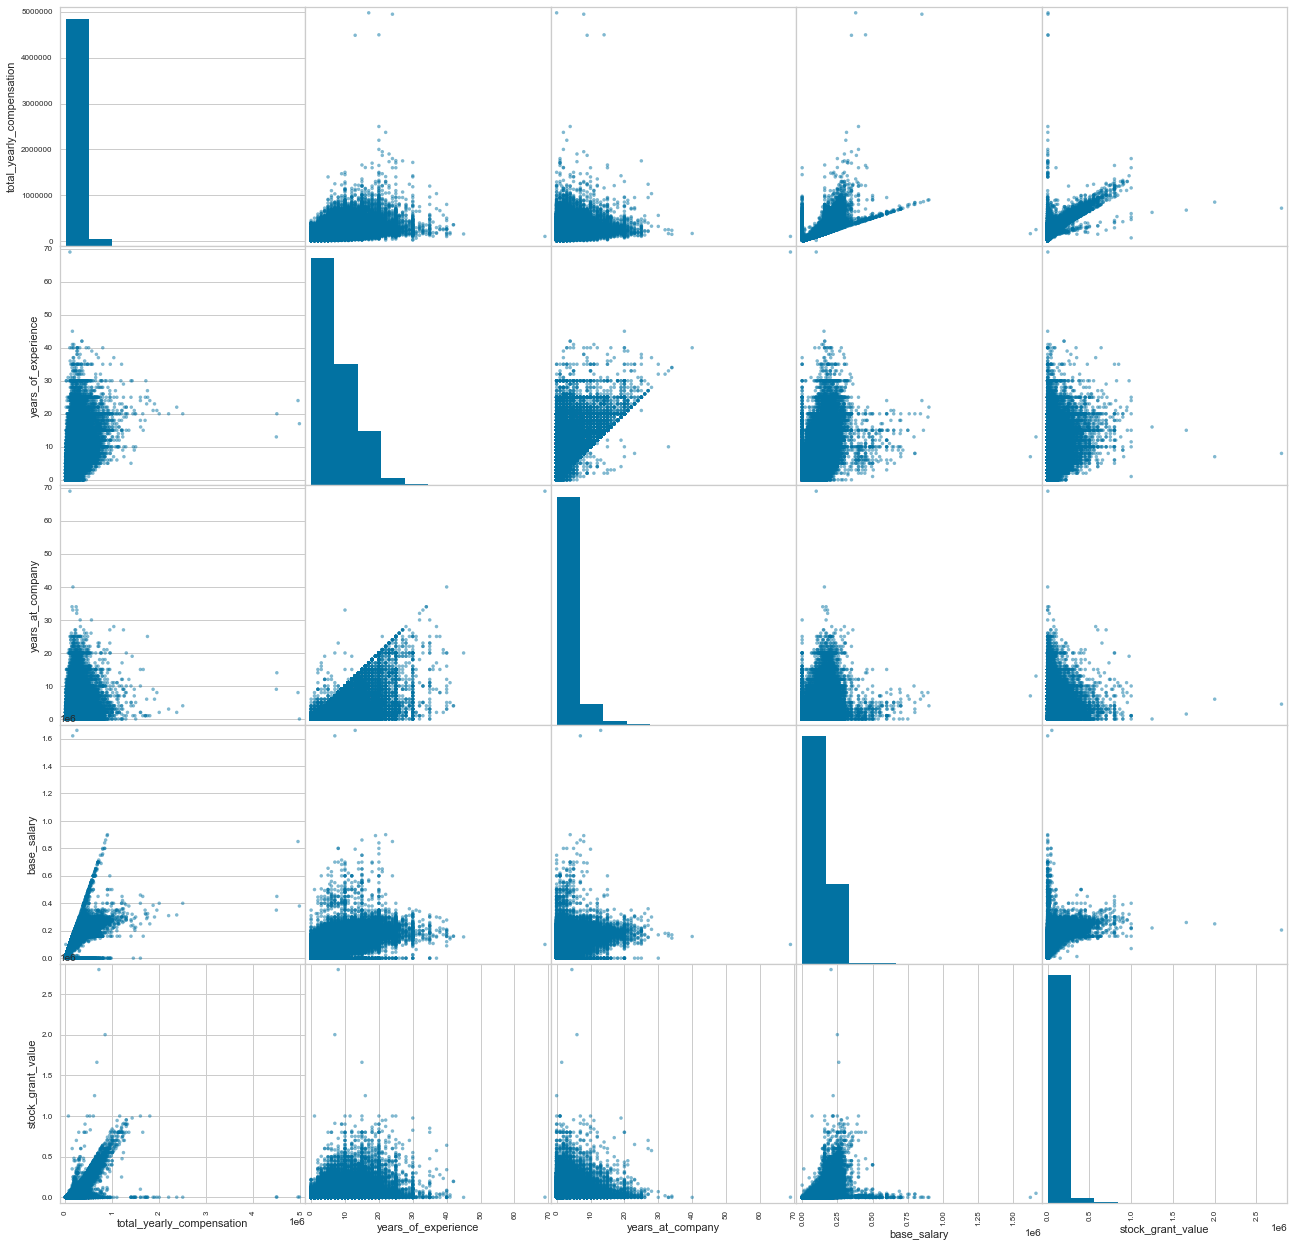

In [47]:
pd.plotting.scatter_matrix(salary_data, alpha=0.5, figsize=(22,22))

In [193]:
salary_data = salary_data[salary_data['total_yearly_compensation'] < 4000000]
salary_data = salary_data[salary_data['base_salary'] < 1600000]
salary_data = salary_data[salary_data['stock_grant_value'] < 2500000]
salary_data = salary_data[salary_data['years_at_company'] < salary_data['years_of_experience']]
index = salary_data[salary_data['gender'] == 'Title: Senior Software Engineer'].index
salary_data.at[index, "gender"] = 'Unknown'

In [194]:
le_gender = LabelEncoder()
salary_data['gender']=salary_data[['gender']].apply(le_gender.fit_transform)

# Race
le_race = LabelEncoder()
salary_data['Race']=salary_data[['Race']].apply(le_race.fit_transform)

# Education
le_education = LabelEncoder()
salary_data['Education']=salary_data[['Education']].apply(le_education.fit_transform)

# company
le_company = LabelEncoder()
salary_data['company']=salary_data[['company']].apply(le_company.fit_transform)
# list(le_company.inverse_transform([5, 2, 1]))

# level
le_level = LabelEncoder()
salary_data['level']=salary_data[['level']].apply(le_level.fit_transform)

# title
le_title = LabelEncoder()
salary_data['title']=salary_data[['title']].apply(le_title.fit_transform)

# location
le_title = LabelEncoder()
salary_data['location']=salary_data[['location']].apply(le_title.fit_transform)

In [195]:
scaler = StandardScaler()
scaler.fit(salary_data)
scaled_salary_data = pd.DataFrame(scaler.transform(salary_data),columns= salary_data.columns )
sd_train, sd_test = train_test_split(scaled_salary_data, test_size = 0.3)

Instead of manually choosing the number of components, we set the criteria for 95% of the variance to be explained so it chooses the best features that way.

In [196]:
pca = PCA(n_components = 0.95)
pca.fit(sd_train)
pca_df = pd.DataFrame(pca.transform(sd_train))
pca_df.describe().T
pca.explained_variance_ratio_.sum()

0.9533823884367558

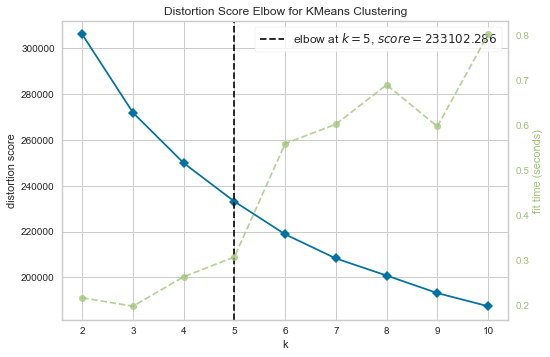

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [192]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_df)
Elbow_M.show()

Differrent clustering methods, Agglomerative, Kmeans on Training data

In [197]:
AC = AgglomerativeClustering(n_clusters=5)
yhat_AC = AC.fit_predict(pca_df)

In [198]:
kmeans = KMeans(n_clusters=5, init='random')
yhat_kmeans = kmeans.fit_predict(pca_df)

In [199]:
kmeans_pp = KMeans(n_clusters=5, init='k-means++')
yhat_kmeans_pp = kmeans_pp.fit_predict(pca_df)

In [200]:
#pca_df["Clusters"] = yhat_AC
#salary_data["Clusters"] = yhat_AC
#scaled_salary_data["Clusters"] = yhat_AC
sd_train["Clusters"] = yhat_AC

In [201]:
#pca_df["Clusters2"] = yhat_kmeans
#salary_data["Clusters2"] = yhat_kmeans
#scaled_salary_data["Clusters2"] = yhat_kmeans
sd_train["Clusters2"] = yhat_kmeans

In [202]:
#pca_df["Clusters3"] = yhat_kmeans_pp
#salary_data["Clusters3"] = yhat_kmeans_pp
#scaled_salary_data["Clusters3"] = yhat_kmeans_pp
sd_train["Clusters3"] = yhat_kmeans_pp

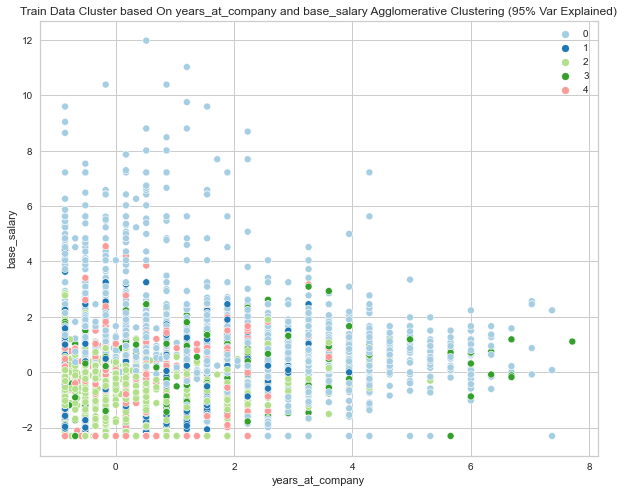

In [203]:
fig = plt.figure(figsize=(10,8))

pl = sns.scatterplot(data = sd_train,x=sd_train["years_at_company"], y=sd_train["base_salary"],hue=sd_train["Clusters"], palette= sns.color_palette('Paired', 5))
pl.set_title("Train Data Cluster based On years_at_company and base_salary Agglomerative Clustering (95% Var Explained)")
plt.legend()
plt.show()

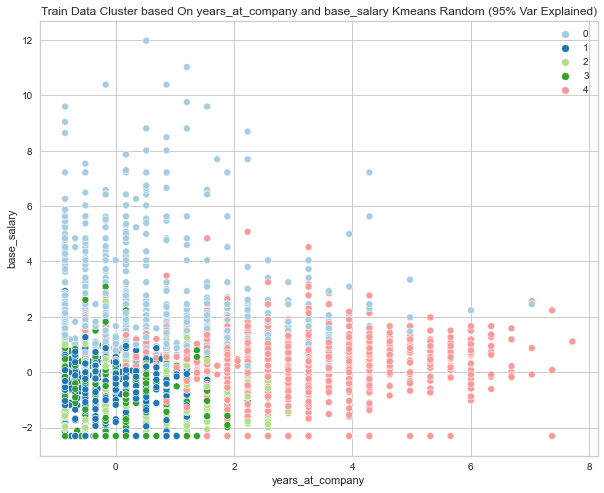

In [204]:
fig = plt.figure(figsize=(10,8))

pl = sns.scatterplot(data = sd_train,x=sd_train["years_at_company"], y=sd_train["base_salary"],hue=sd_train["Clusters2"], palette= sns.color_palette('Paired', 5))
pl.set_title("Train Data Cluster based On years_at_company and base_salary Kmeans Random (95% Var Explained)")
plt.legend()
plt.show()

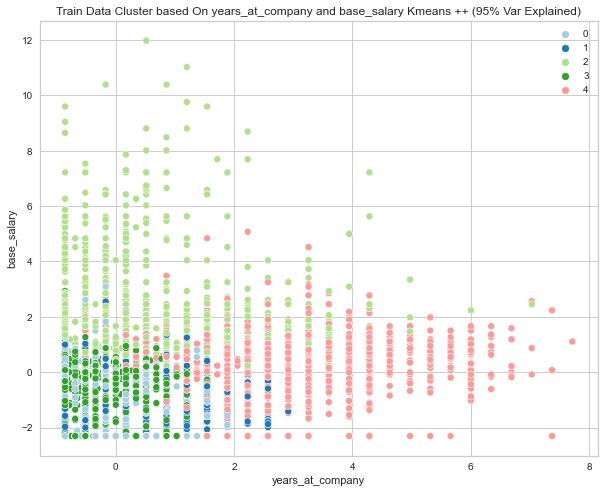

In [205]:
fig = plt.figure(figsize=(10,8))

pl = sns.scatterplot(data = sd_train,x=sd_train["years_at_company"], y=sd_train["base_salary"],hue=sd_train["Clusters3"], palette= sns.color_palette('Paired', 5))
pl.set_title("Train Data Cluster based On years_at_company and base_salary Kmeans ++ (95% Var Explained)")
plt.legend()
plt.show()

Against test data 

In [206]:
pca = PCA(n_components = 0.95)
pca.fit(sd_test)
pca_df2 = pd.DataFrame(pca.transform(sd_test))
pca_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
0,13336.0,2.364302e-17,1.650580,-3.704470,-1.086030,-0.282621,0.797869,14.183707
1,13336.0,1.172515e-16,1.299413,-2.321706,-1.045333,-0.139367,1.035967,4.513912
2,13336.0,5.121545e-17,1.148028,-6.282974,-0.802618,-0.170324,0.598651,6.848423
3,13336.0,1.051032e-16,1.058076,-3.241010,-0.683073,-0.136186,0.748136,3.270981
4,13336.0,9.584165e-18,0.975181,-2.424206,-0.715036,-0.118425,0.504810,4.041822
5,13336.0,5.844155e-18,0.959573,-3.355298,-0.715318,-0.191151,0.651440,5.000181
6,13336.0,-5.529470e-17,0.950610,-2.807972,-0.703862,0.027413,0.630304,3.732303
7,13336.0,-1.010656e-17,0.856719,-2.509559,-0.642972,-0.277892,0.654969,2.668565
8,13336.0,-3.979354e-17,0.755008,-7.979961,-0.420112,-0.039663,0.391712,11.145113
9,13336.0,-3.883616e-17,0.715032,-3.639443,-0.429972,-0.032847,0.552445,3.960212


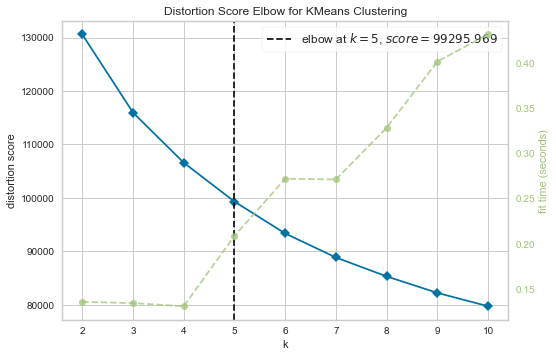

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [207]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_df2)
Elbow_M.show()

In [208]:
AC = AgglomerativeClustering(n_clusters=5)
yhat_AC = AC.fit_predict(pca_df2)
sd_test["Clusters"] = yhat_AC

In [209]:
kmeans = KMeans(n_clusters=5, init='random')
yhat_kmeans = kmeans.fit_predict(pca_df2)
sd_test["Clusters2"] = yhat_kmeans

In [210]:
kmeans_pp = KMeans(n_clusters=5, init='k-means++')
yhat_kmeans_pp = kmeans_pp.fit_predict(pca_df2)
sd_test["Clusters3"] = yhat_kmeans_pp

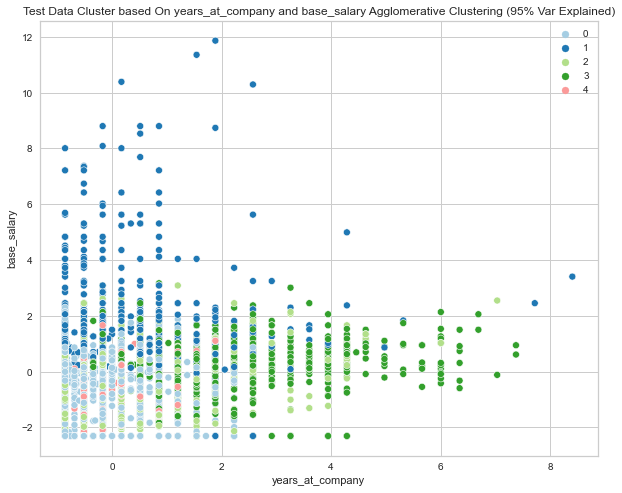

In [211]:
fig = plt.figure(figsize=(10,8))

pl = sns.scatterplot(data = sd_test,x=sd_test["years_at_company"], y=sd_test["base_salary"],hue=sd_test["Clusters"], palette= sns.color_palette('Paired', 5))
pl.set_title("Test Data Cluster based On years_at_company and base_salary Agglomerative Clustering (95% Var Explained)")
plt.legend()
plt.show()

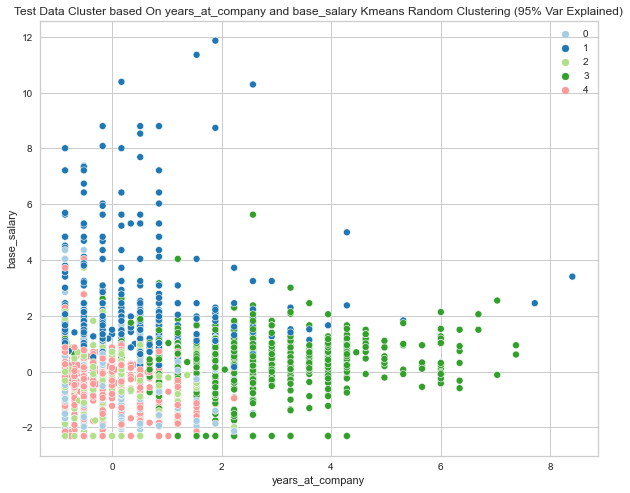

In [212]:
fig = plt.figure(figsize=(10,8))

pl = sns.scatterplot(data = sd_test,x=sd_test["years_at_company"], y=sd_test["base_salary"],hue=sd_test["Clusters2"], palette= sns.color_palette('Paired', 5))
pl.set_title("Test Data Cluster based On years_at_company and base_salary Kmeans Random Clustering (95% Var Explained)")
plt.legend()
plt.show()

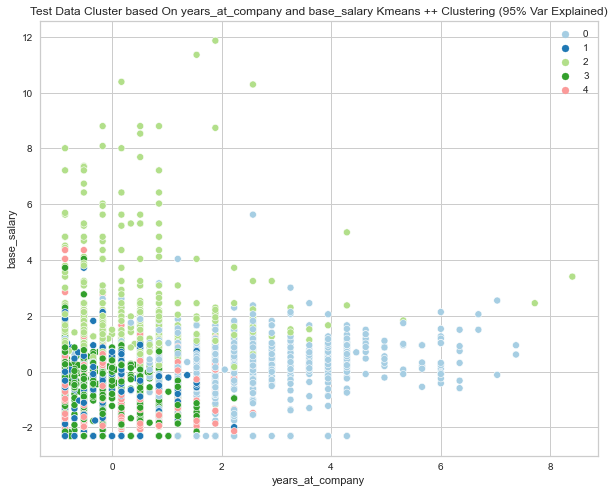

In [213]:
fig = plt.figure(figsize=(10,8))

pl = sns.scatterplot(data = sd_test,x=sd_test["years_at_company"], y=sd_test["base_salary"],hue=sd_test["Clusters3"], palette= sns.color_palette('Paired', 5))
pl.set_title("Test Data Cluster based On years_at_company and base_salary Kmeans ++ Clustering (95% Var Explained)")
plt.legend()
plt.show()